In [74]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2, Xception, VGG16
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [38]:
img_width, img_height = 180, 180

In [39]:
train_data = keras.preprocessing.image_dataset_from_directory('./flowers/', subset='training',seed=42, 
                                                            validation_split=0.25, image_size=(img_width, img_height))
val_data = keras.preprocessing.image_dataset_from_directory('./flowers/', subset='validation',seed=42, 
                                                        validation_split=0.25, image_size=(img_width, img_height))

Found 4317 files belonging to 5 classes.
Using 3238 files for training.
Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


In [40]:
num_classes = len(val_data.class_names)

In [41]:
def plot_graph(validation_data, training_data, graph_type):
    plt.clf()
    epochs = range(1, len(training_data) + 1)
    plt.plot(epochs, training_data, 'r', label='Training '+graph_type)
    plt.plot(epochs, validation_data, 'b', label='Validation '+graph_type)
    plt.title('Training and validation '+graph_type)
    plt.xlabel('Epochs')
    plt.ylabel(graph_type)
    plt.legend()
    plt.show()

In [42]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_width, img_height, 3)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPool2D())
model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 16)       

In [44]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
102/102 [==============================] - 81s 781ms/step - loss: 1.3255 - accuracy: 0.4185 - val_loss: 1.1626 - val_accuracy: 0.5070
Epoch 2/10
102/102 [==============================] - 80s 788ms/step - loss: 1.0872 - accuracy: 0.5615 - val_loss: 1.0152 - val_accuracy: 0.5709
Epoch 3/10
102/102 [==============================] - 78s 762ms/step - loss: 0.9271 - accuracy: 0.6414 - val_loss: 1.0167 - val_accuracy: 0.5894
Epoch 4/10
102/102 [==============================] - 83s 808ms/step - loss: 0.8306 - accuracy: 0.6773 - val_loss: 1.0282 - val_accuracy: 0.5996
Epoch 5/10
102/102 [==============================] - 75s 736ms/step - loss: 0.6788 - accuracy: 0.7573 - val_loss: 1.0115 - val_accuracy: 0.6052
Epoch 6/10
102/102 [==============================] - 76s 749ms/step - loss: 0.5194 - accuracy: 0.8150 - val_loss: 1.0552 - val_accuracy: 0.6172
Epoch 7/10
102/102 [==============================] - 81s 789ms/step - loss: 0.3408 - accuracy: 0.8758 - val_loss: 1.2861 - val_ac

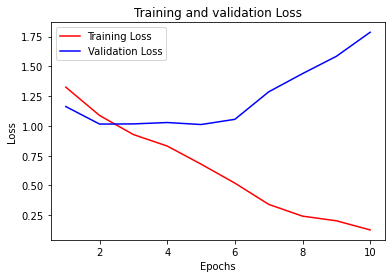

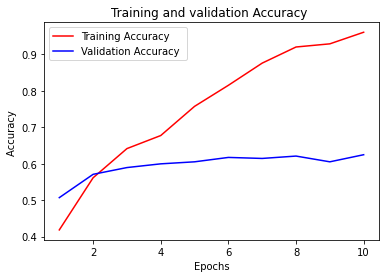

In [45]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

#### Augumenting input  data

In [116]:
model = Sequential()
model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
model.add(layers.experimental.preprocessing.RandomRotation(0.2))
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_width, img_height, 3)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPool2D())
model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [117]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
102/102 [==============================] - 71s 682ms/step - loss: 1.3179 - accuracy: 0.4265 - val_loss: 1.1182 - val_accuracy: 0.5171
Epoch 2/10
102/102 [==============================] - 67s 652ms/step - loss: 1.1183 - accuracy: 0.5500 - val_loss: 1.2627 - val_accuracy: 0.4829
Epoch 3/10
102/102 [==============================] - 66s 648ms/step - loss: 1.0472 - accuracy: 0.5923 - val_loss: 0.9952 - val_accuracy: 0.6089
Epoch 4/10
102/102 [==============================] - 66s 650ms/step - loss: 0.9912 - accuracy: 0.6103 - val_loss: 0.9465 - val_accuracy: 0.6219
Epoch 5/10
102/102 [==============================] - 67s 657ms/step - loss: 0.9368 - accuracy: 0.6359 - val_loss: 0.8873 - val_accuracy: 0.6497
Epoch 6/10
102/102 [==============================] - 67s 654ms/step - loss: 0.8991 - accuracy: 0.6424 - val_loss: 0.8567 - val_accuracy: 0.6645
Epoch 7/10
102/102 [==============================] - 69s 677ms/step - loss: 0.8714 - accuracy: 0.6606 - val_loss: 0.8709 - val_ac

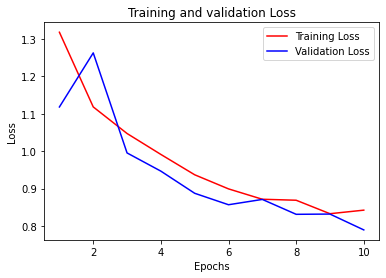

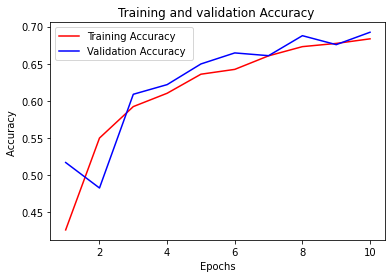

In [118]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

In [119]:
# model = Sequential()
# model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
# model.add(layers.experimental.preprocessing.RandomRotation(0.2))
# model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_width, img_height, 3)))
# model.add(Conv2D(64, 3, activation='relu'))
# model.add(MaxPool2D())
# model.add(Conv2D(32, 3, activation='relu'))
# model.add(MaxPool2D())
# model.add(Conv2D(16, 3, activation='relu'))
# model.add(MaxPool2D())
# model.add(layers.Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(num_classes))
# model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [120]:
# history = model.fit(train_data, validation_data=val_data, epochs=10)

In [121]:
# history = history.history
# plot_graph(history['val_loss'], history['loss'], 'Loss')
# plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

### Classification display

In [122]:
def prepareImage(file_path):
    img_array = cv2.imread(file_path)
    new_array = cv2.resize(img_array, (160, 160))
    return new_array.reshape(-1, 160, 160, 3, 1)

In [123]:
def predict_images(file_paths, model):
    test_classes = test_data.class_names
    for path in test_data.file_paths:
        highest_val_index = np.argmax(model.predict(prepareImage(path))[0])
    test_classes = test_data.class_names
    fig = plt.figure(figsize=(20, 20))
    correct_count = 0;
    for i, path in enumerate(test_data.file_paths):
        highest_val_index = np.argmax(model.predict(prepareImage(path))[0])
        label=test_classes[highest_val_index]
        additional_text = "" if path.count(label) > 0 else " (Not Correct) " + path.split('/')[2]
        if (additional_text == ""):
            correct_count = correct_count + 1
        label = label + additional_text
        img = image.load_img(path, target_size=(160,160))
        fig.add_subplot(5,5, i+1)
        plt.title(label)
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.imshow(img)
    print("Number of correct prediction is ", correct_count)

### Use pretrained models

#### Feature extraction

In [194]:
train_data = keras.preprocessing.image_dataset_from_directory('./flowers/', subset='training',seed=42, 
                                                            validation_split=0.25, image_size=(160, 160))
val_data = keras.preprocessing.image_dataset_from_directory('./flowers/', subset='validation',seed=42, 
                                                        validation_split=0.25, image_size=(160, 160))

Found 4317 files belonging to 5 classes.
Using 3238 files for training.
Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


In [195]:
base_model = MobileNetV2(weights='imagenet',include_top=False, input_shape=(160,160, 3))

In [196]:
base_model.trainable = False

In [197]:
len(base_model.layers)

154

In [198]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_10[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [199]:
model = Sequential()
model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
model.add(layers.experimental.preprocessing.RandomRotation(0.2))
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(160, 160, 3)))
model.add(base_model)
model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes))
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [200]:
history = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
102/102 [==============================] - 52s 445ms/step - loss: 1.4803 - accuracy: 0.6238 - val_loss: 0.5344 - val_accuracy: 0.8100
Epoch 2/20
102/102 [==============================] - 45s 443ms/step - loss: 0.7287 - accuracy: 0.7261 - val_loss: 0.4704 - val_accuracy: 0.8295
Epoch 3/20
102/102 [==============================] - 44s 434ms/step - loss: 0.6578 - accuracy: 0.7526 - val_loss: 0.4347 - val_accuracy: 0.8499
Epoch 4/20
102/102 [==============================] - 45s 441ms/step - loss: 0.5820 - accuracy: 0.7835 - val_loss: 0.4422 - val_accuracy: 0.8360
Epoch 5/20
102/102 [==============================] - 44s 432ms/step - loss: 0.5824 - accuracy: 0.7854 - val_loss: 0.4011 - val_accuracy: 0.8545
Epoch 6/20
102/102 [==============================] - 44s 434ms/step - loss: 0.5727 - accuracy: 0.7804 - val_loss: 0.4106 - val_accuracy: 0.8638
Epoch 7/20
102/102 [==============================] - 49s 484ms/step - loss: 0.5390 - accuracy: 0.7931 - val_loss: 0.3920 - val_ac

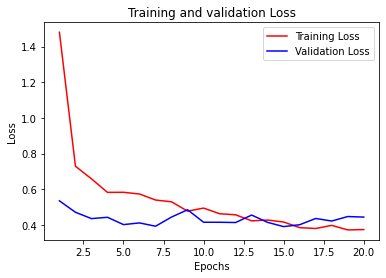

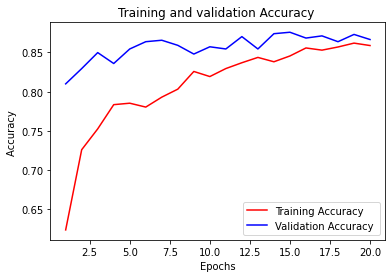

In [201]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

In [202]:
test_data = keras.preprocessing.image_dataset_from_directory('./evaluation-images/',
                                                               image_size=(160, 160),
                                                               batch_size=16)

Found 25 files belonging to 5 classes.


In [203]:
model.evaluate(test_data)

2/2 [==============================] - 0s 98ms/step - loss: 1.1270 - accuracy: 0.6800


[1.1269608736038208, 0.6800000071525574]

Number of correct prediction is  14


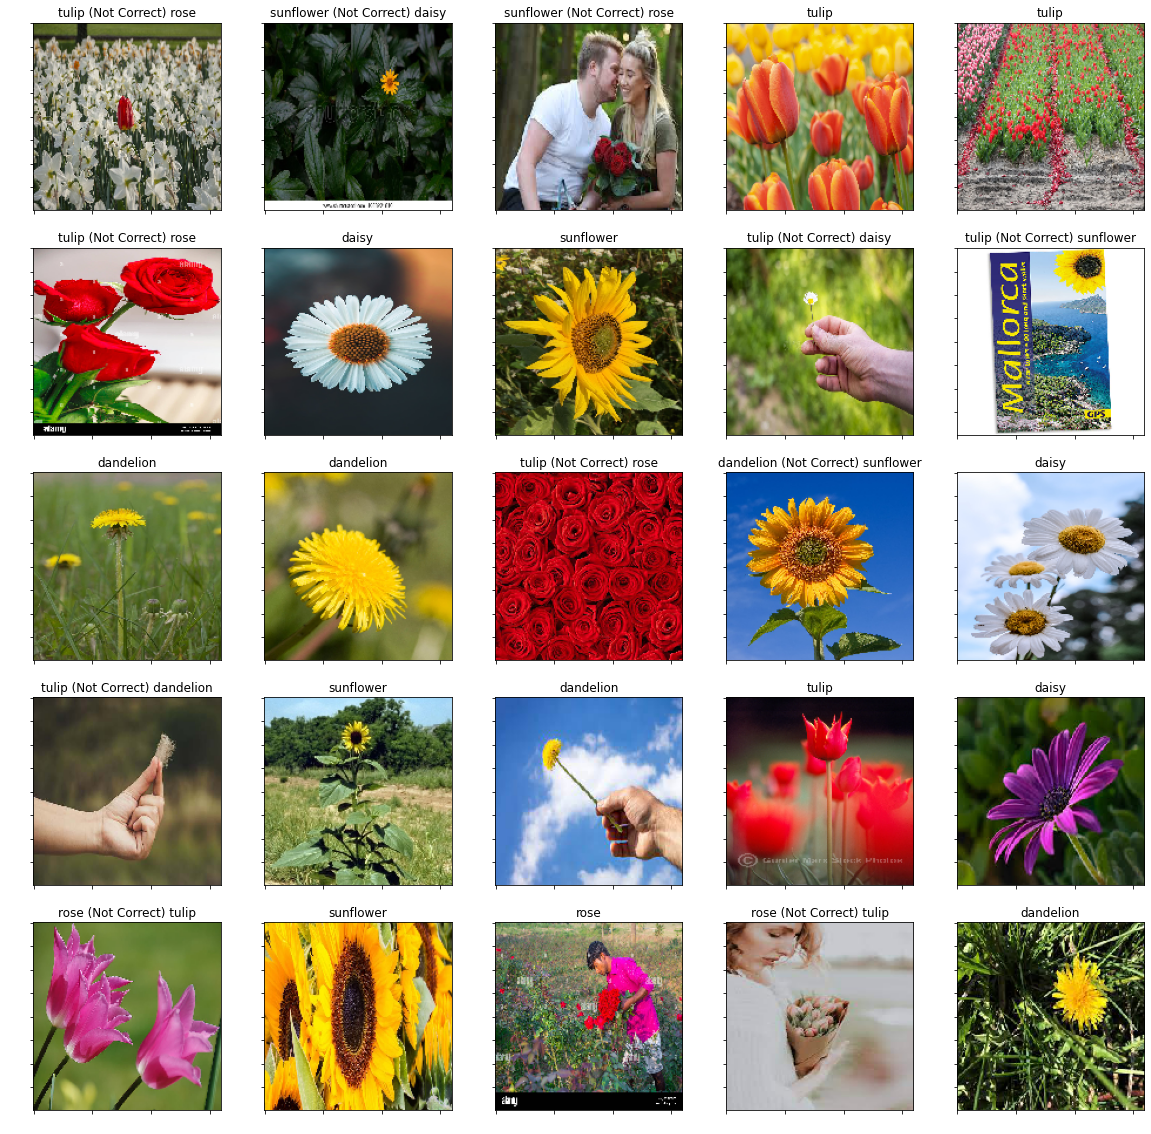

In [204]:
predict_images(test_data.file_paths, model)

In [205]:
base_model.trainable = False

In [206]:
for i in range(len(base_model.layers)-1,145,-1):
    base_model.layers[i].trainable = True

In [207]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [208]:
history = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
102/102 [==============================] - 49s 453ms/step - loss: 0.6101 - accuracy: 0.7943 - val_loss: 0.5355 - val_accuracy: 0.8360
Epoch 2/20
102/102 [==============================] - 45s 439ms/step - loss: 0.4697 - accuracy: 0.8342 - val_loss: 0.5951 - val_accuracy: 0.8443
Epoch 3/20
102/102 [==============================] - 45s 441ms/step - loss: 0.4667 - accuracy: 0.8271 - val_loss: 0.5262 - val_accuracy: 0.8517
Epoch 4/20
102/102 [==============================] - 46s 453ms/step - loss: 0.4664 - accuracy: 0.8366 - val_loss: 0.5232 - val_accuracy: 0.8462
Epoch 5/20
102/102 [==============================] - 44s 434ms/step - loss: 0.4618 - accuracy: 0.8332 - val_loss: 0.5353 - val_accuracy: 0.8462
Epoch 6/20
102/102 [==============================] - 47s 464ms/step - loss: 0.4494 - accuracy: 0.8379 - val_loss: 0.4748 - val_accuracy: 0.8610
Epoch 7/20
102/102 [==============================] - 45s 440ms/step - loss: 0.4312 - accuracy: 0.8456 - val_loss: 0.4512 - val_ac

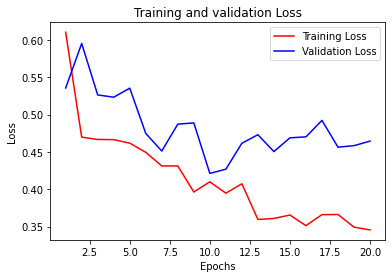

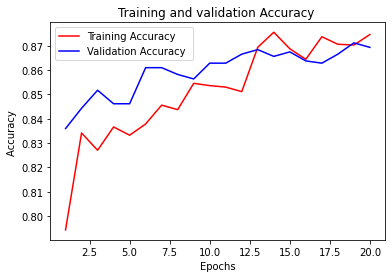

In [209]:
history = history.history
plot_graph(history['val_loss'], history['loss'], 'Loss')
plot_graph(history['val_accuracy'], history['accuracy'], 'Accuracy ')

In [210]:
model.evaluate(test_data)

2/2 [==============================] - 0s 79ms/step - loss: 0.6689 - accuracy: 0.8000


[0.6689380407333374, 0.800000011920929]

Number of correct prediction is  14


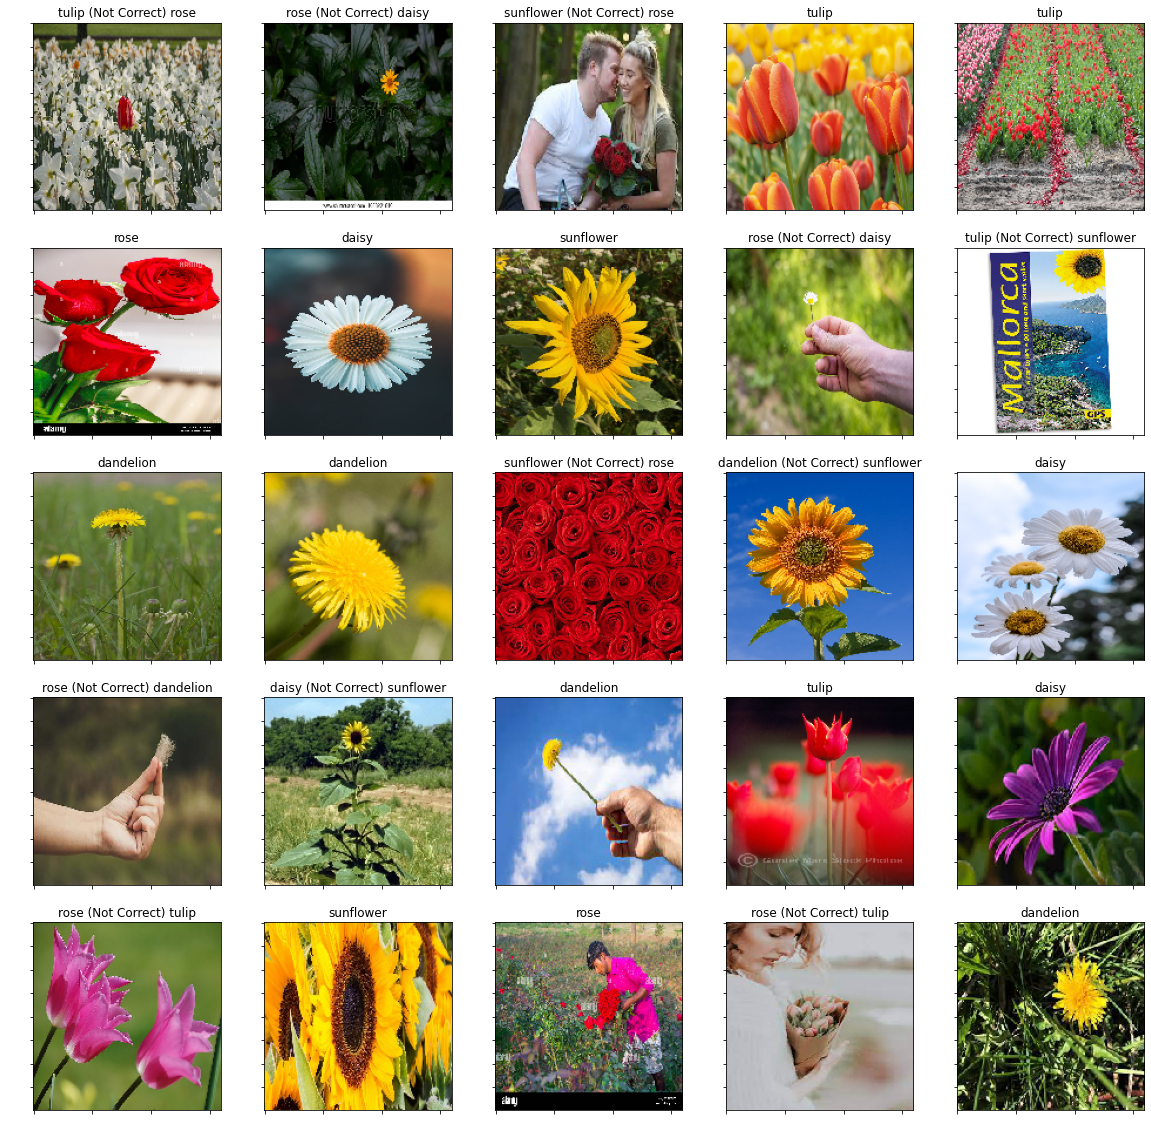

In [211]:
predict_images(test_data.file_paths, model)